# Deep Learning

* <strong>Deep Learning:</strong> aslında machine learning tekniklerinden bir tanesidir ve featurelari datadan ogrenir.
* <strong>Neden Deep Learning Kullaniyoruz?</strong>
* Dunyada data sayilari arttikca makine ogrenmesi performansi acisindan iyi sonuclar vermemeye basladi.
* Datanin 1 milyon olmasi durumunda gunumuzde buyuk miktarda oldugu kabul edilmektedir.
* <strong>Deep Learning Nerelerde Kullanilir?</strong>
* speech recognition, image classification, natural language process(NLP), recommendation systems.
* Deep learnşng machine learning'in alt kumesidir. (Deep learning apmak, ML yapmaktir fakat her ML teknigi deep learning degildir.)
* ML'de feature'lar manual olarak verilir.
* Deep learning direct olarak datadan featurelari ogrenir.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data Set 

* Data set olarak sign language data set kullanacagiz.
* Bu datada 2062 adet isaret dili fotograflari yer almaktadir.
* Bilindigi uzere sayilar 0-9 arasidir. 10 adet unique sayimiz mevcut.
* Suan sadece 0 ve 1'i classify etmeyi ogrenecegiz. 
- Bu veri setinde 204 ve 408 arasindakiler 0.
- 822 ve 1027 arasinda olanlar ise 1'i ifade eder.
* Her bir siniftan 205 adet sample'a sahibiz. 
- X array'i icerisinde fotograflar, Y arrayi icerisinde ise labellar mevcut.

(-0.5, 63.5, 63.5, -0.5)

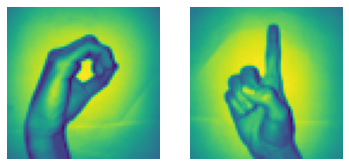

In [2]:
x_l = np.load("data/X.npy")
y_l= np.load("data/Y.npy")
img_size=64 #bu bize verilen bilgi
plt.subplot(1,2,1) # iki tane subplot'un birincisi
plt.imshow(x_l[260].reshape(img_size,img_size)) #64X64'luk hale getir ve goster.
plt.axis("off") #  x ve y eksenlerinin gozukmemesi icin yazildi.
plt.subplot(1,2,2) # iki tane subplottan ikincisi
plt.imshow(x_l[900].reshape(img_size,img_size)) #datadaki 900. simple'i al 64x64 yap ve goster.
plt.axis("off")

- Bir tane numpy array yaratmak icin 0 ve 1'leri birlestirecegim: 

In [3]:
x = np.concatenate((x_l[204:409],x_l[822:1027]), axis=0) #0 ve 1'ler
z = np.zeros(205) #label 0
o = np.ones(205) #label 1
y = np.concatenate((z,o),axis=0).reshape(x.shape[0],1)
#labellar birlesitirildir axis = 0 yukaridan asagi birlestir demek.
print("X shape:",x.shape)
print("Y shape:",y.shape)

X shape: (410, 64, 64)
Y shape: (410, 1)


* 410 benim datadaki 205 adet 0 ve 205 adet 1'i ifade ediyor.
* 64 X 64 ise bir fotografin 64x64 bir matrixten olustugunu ifade eder.64 adet x ekseninde, 64 adet ise y ekseninde piksel vardir toplam 4096 tane piksel vardir.
- (410, 1) ise 410 tane 0 ve 1'lerden olusan labellari ifade ediyor.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=42)
# data %75'i train %15'i test olarak ayrildi
#her calistirdigimizda ayni randomlikta datayi bolmesi icin random_state kullanildi
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [5]:
print(number_of_train)
print(number_of_test)

348
62


- Suanda 3 boyutlu bir arraye sahibiz(X) bunu 2D'ye indirmemiz gerekiyor.
- Y vektorumuz 2 boyutlu, X vektorunu de iki boyutlu yapacagiz.

In [6]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("x train flatten",x_train_flatten.shape)
print("x test flatten",x_test_flatten.shape)

x train flatten (348, 4096)
x test flatten (62, 4096)


- 348 adet train datamız var 4096 pikselden olusuyor.
- 62 adet test datamiz var 4096 pikselden olusuyor.

In [7]:
x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_train = y_train.T
y_test = y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train ", y_train.shape)
print("y test ", y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train  (1, 348)
y test  (1, 62)


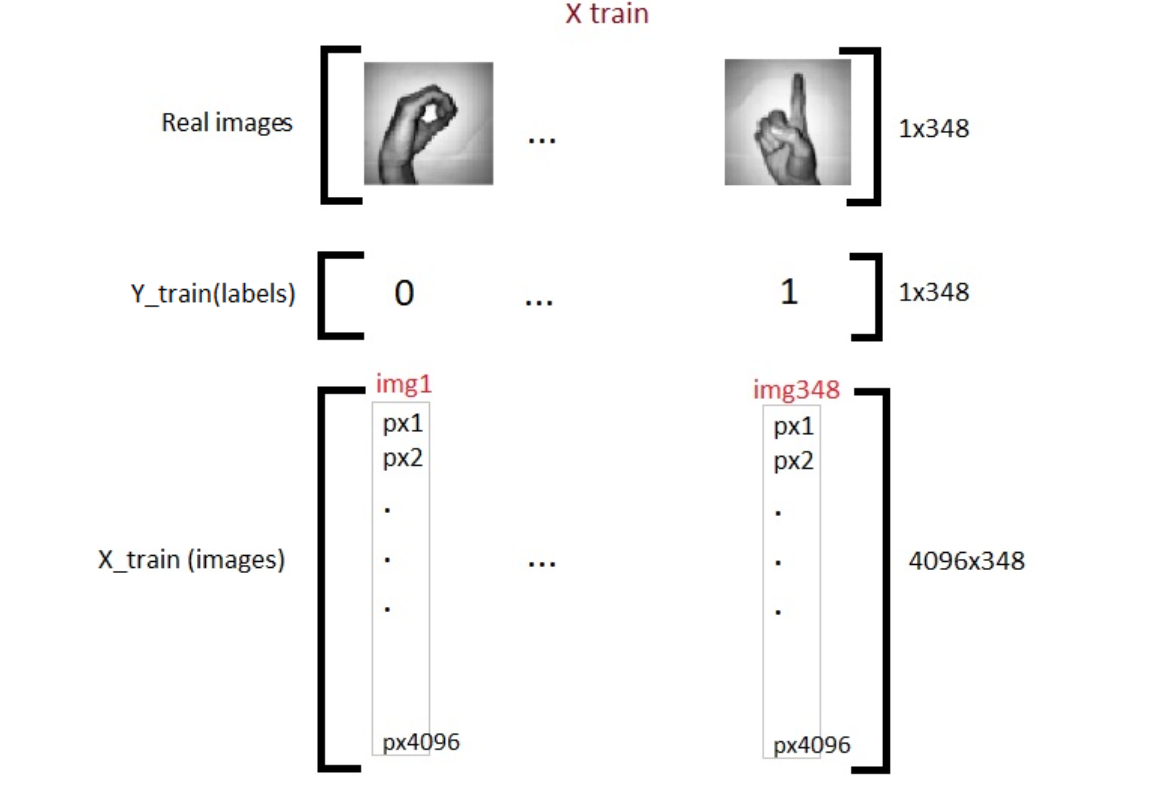

In [8]:
from IPython.display import Image
Image(filename='ft.png') 

- Goruldugu gibi fotograflar ve y_train(etiketler) tek satir ve 348 sutunluk bir matris.
- Her fotograf ve ona karsilik gelen labellar matrisin ayini elemanini gosteriyor.
- x_train'de ise her sutun bir fotografi isaret ediyor yine 348 sutun var satirlar ise pikselleri ifade ediyor.

# Logistic Regression

- Binary classification yapar (0 ya da 1, kedi ya da köpek vb..)
- Binary classification en küçük neural network
- Logistic regression simple neural networktur.

## Computation Graph

- Matematiksel ifadeleri görselleştirmek için kullanılan bir yöntem.
- örneğin c= a^2 + b^2'nin karekökünü aşağıdaki gibi görselleştirebiliriz.

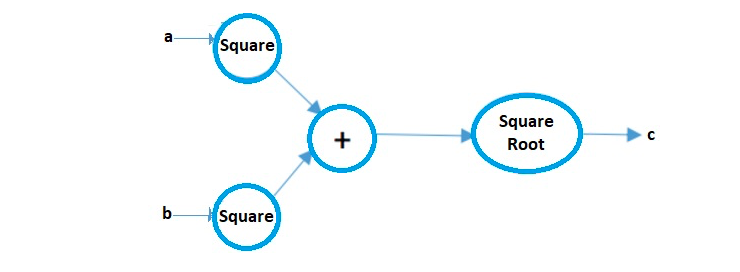

In [11]:
from IPython.display import Image
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/b.png') 

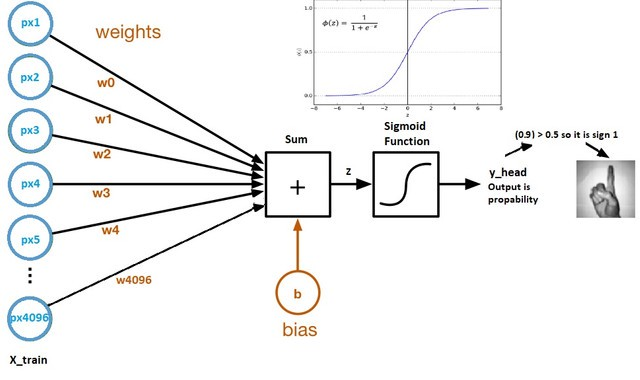

In [12]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/m.jpeg') 

- Parametreler ağırlık ve bias.
- Weights(Ağırlık): her pikselin coefficient'ı
- Bias: intercept (kesişim)
- z = (w.t)x + b => z eşittir (transpose of weights times input x) + bias
- Başka bir değişle => z = b + px1w1 + px2w2 + ... + px4096*w4096
-----------
- y_head(predict ettiğim değer) = sigmoid(z)
- Sigmoid Function aktivasyon fonksiyonu olarak geçer.
- Sayımızı 0 ila 1 arasına eşitler.
- Bu da benim outputumun olasılıksal bir değer olmasını sağlar.
- Output'a bir treshold değeri verirsem 0.4'ten büyükse 1 değilse 0 label'ına eşit oluyor.
-----------
- Neden Sigmoid Function kullandık ?
- Çünkü olasılıksal bir sonuç verir.
- Türevi alınabilen bir fonksiyon, bu da weight ve bias değerlerimizi güncellememizi sağlıyor.
----------
- Eğer sonucum yanlış çıkarsa geriye doğru işlem yapmaya başlarız.
- Sigmoidin ve linear işlemlerin türevi alınır. 
- weight ve bias güncellenir.

## Initializing Parameters

- weightlere 0.01 initial deger atayabiliriz.
- daha sonr amodel weight ve biasları kendi guncelleyecektir.
- ayno şekilde bias'a 0 verebiliriz.


## Forward Propagation

- Pixellerden cost fonksiyona kadar olan tüm adımlara forward propagation diyoruz.
- z = (w.t)x + b  
- ve z'yi sigmoid fonksiyonun icine koyup bir y_head ile olasılıksal bir deger elde ediyoruz.
- log loss(error) function asagidaki gibidir: 

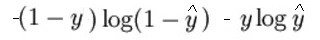

In [14]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/duzeltme.jpeg') 

- Cost function ise benim loss function degerlerimin toplamidir.
----
- Yani önce z degeri hesaplanır, sonra z sigmoid function'a sokulur bir y_head degeri elde edilir daha sonra y ve y_head degerleri'ni loss function'a sokup bir deger elde ettim.
- Daha sonra yukaridaki tum adimlari baska bir degerle yeniden yaptım ve yine bir loss function degeri elde ettim
- Son adım olarak loss functionları toplayarak bir cost fonction degeri elde ettim.
- Bu sürecin tamamı forward propagation olarak gecer.
----
- Yukarıdaki adımları for ile yapabiliriz fakat bu yavaş olacaktır. Eğer tüm degerlerimi bir matrisin icine alıp tek bir cost degeri elde ederim eger yuksek cikarsa modelin iyi olmadigini anlayip agirlik ve bias degerlerimi güncellemem gerekiyor.
-------
- Şimdi ise cost fonksiyonundan bahsedilecek. Z değeri hesaplandıktan sonra z sigmoid fonksiyona sokulur ve y_head değeri hesaplanır. Y ve y_head değerleri bir loss function’a sokulur. Her değer için bu işlemler tekrarlanır. Son olarak loss function’lar toplanır ve cost fonction yani maliyet fonksiyonu hesaplanmış olur. Bu değer yüksek çıkarsa benim z değerini hesaplarken kullandığım weight ve bias değerlerimin güncellenmesi gerekir. Z değeri hesaplamaktan cost fonksiyonunu bulmaya kadar geçen süreye ise forward propagation denir. 
----
- Cost’un weight ve bias’a bağlı olduğundan bahsedilmişti. Cost’u azaltmak için bunların update edilmesi gerekir.
-------
- ÖZET: Bir sürü resim var bunlar piksel piksel her biri bir column'da tutuluyor. 4096 x n'lik bir array. Buradaki her piksel weightlerle çarpılır ve bias'la toplanır ve bir z değeri elde edilir. Daha sonra z degeri sigmoid'e sokulur ve y_head degeri elde edilir. Y_head degeri geçek labellar ile karşılaştırılır hepsi için bir loss(error) değeri bulunur. Hepsi toplanıp cost function elde edilir.  Ve forward propagation işlemi tamamlandı.

## Bacward Propagation

- Cost function'u azaltacak şekilde weight ve bias güncelleme işlemine backward propagation denir. Bu işlem cost function'dan geriye doğru gider. 
- Backward Propagation yaparken kullanılan method <strong>gradient descent</strong>'dir.

### Optimization Algorithm with Gradient Descent

- Optimize etmek demek bir şeyin en uygun değerini bulmak demek.
- Peki neyin en uygun değerini bulmak ? Parametrelerin. 
- Cost'u en az yapacak parametreleri bulmak bunlar da weight ve bias'dır. 
- Cost bizim maliyetimiz ve hatalarımızın toplamıdır ve bunu azaltmamız gerekiyor. 
- Her şey initial değerlerinden sonra başlıyor çünkü cost bizim parametrelerimize bağlı. 
- Bu yüzden cost'u azaltmak için weight ve bias'ı update etmemiz gerekir. 

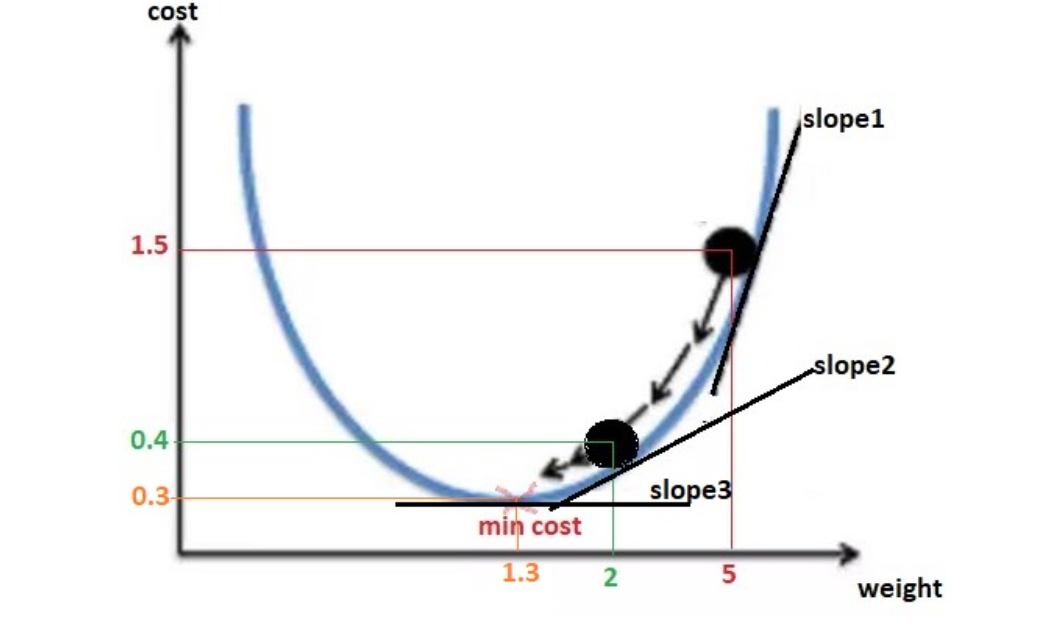

In [15]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/cost.png') 

- Yukarıdaki fotoğrafta benim w yani ağırlığım 5 ve bunun cost’taki karşılığı 1.5, şuan minumum değil ve aşağı doğru giderek weight’i azaltmamız gerekiyor,bu şekilde minimum cost’a ulaşabilirim.
- W = w - step yapacağız step ise bizim için slope’dur. Slope ise eğim demektir. 5’e 1.5 olan noktanın , cost fonksiyonunu dik kestiği line, bu noktanın bu fonksiyona göre eğimi yani slope’udur.
- Slope1=3 ise yeni w değeri w=5-3’ten 2 olur. Tekrardan forward propagation yapacak olursak, slope2=0.7 ise yeni w değeri w=2-0.7’den w=1.3 olur. Yeniden forward propagation yapılır ve slope3=0.01 ise w=1.29 çıkar neredeyse 1.3’e eşit olduğu neredeyse değişme olmadığı için minumum noktaya ulaştığımı düşünürüm.
----
- Bir fonksiyonun bir noktaya göre türevi o fonksiyonun eğimini verir yani eğer minimum cost olsun istiyorsak o fonksiyonun o noktaya göre türevini sıfıra yaklaştırmak zorundayım. 

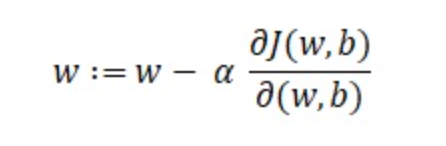

In [16]:
Image(filename='/Users/bestecetin/Desktop/machine_learning/courses/machinelearning/Classification/LogisticRegressionClassification/foto/c.png') 

- İse formülümüzdür.
- Aslında yapılan işlem türevini almaktır.
- W,b ise weight ve bias demektir. Weight için anlatılan her şey bias için de geçerlidir. 
- a ise learning rate ya da öğrenme oranı, öğrenme hızı olarak geçer. Çok küçük bir değer olması durumunda öğrenme çok yavaş olur büyük olması durumunda ise minimum olan değeri kaçırıp çok başka bir değere zıplamış olabiliriz bu yüzden ne çok küçün ne de çok büyük olması gerekir.
- Learning rate hyperparameter’dir. Yani bir değer verilir ve sonra bu değer değiştire, değiştire deneyerek ayarlanacak demektir.

### Implementing Initializing Parameters

In [19]:
def initialize_weights_and_bias(dimension): 
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w,b

* np.full -> 4096 yani dimension,1 kadar bir matrix oluşturur. 
* Matrix'in içine virgülden sonra belirlediğimiz değeri koyar (0.01).
* Yani weightler için 4096,1'lik 0.01 ile dolu bir matris yaptım.
* bias'ı ise b = 0.0 ile seçtim.

### Implementing Forward Propagation

In [21]:
#sigmoid function
def sigmoid(z):
    y_head = 1/ (1+np.exp(-z))
    return y_head
# z = np.dot(w.T,x_train) + b
# y_head = sigmoid(z)

In [27]:
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) 
    y_head = sigmoid(z) #olasılıksal deger dondurur 0-1 arası
    loss = (np.sum(loss)) / x_train.shape[1] #348'e bolduk yani samplensayisi kadar
    return cost

In [24]:
x_train.shape

(4096, 348)

- np.dot carpma icin kullanilir.

### Implementing Backward Propagation

* Burada backward'ı yazarken önce forward'da yazdığımız kodu copy paste edeceğiz yazacağımız fonksiyon ikisini de yapacak

In [49]:
def forward_backward_propagation(w,b,x_train,y_train):
    
    #forward propagation
    z = np.dot(w.T,x_train) 
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1] 
    
    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight, "derivative_bias": derivative_bias}
    
    return cost, gradients
    

In [34]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion): #kac kez forward backwar yapacagım
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0: # 10 adımda bir mevcut cost'u print edecegiz
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list


In [56]:
#prediction
def prediction(w,b,x_test):
    #prediction yapmak icin x_test'e ihtiyacımız var, forward pro. yapmamız gerekiyor.
    z = sigmoid(np.dot(w.T,x_test)+b) #olsılıksal deger dondurur.
    Y_prediction = np.zeros((1,x_test.shape[1])) #0'lardan olan matrix
    # z > 0.5 ise tahminimiz 0
    # x < 0.5 ise tahminimiz 1
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction   

### Implementing Logistic Regression

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.537123
Cost after iteration 20: 2.575352
Cost after iteration 30: 2.395930
Cost after iteration 40: 2.183071
Cost after iteration 50: 1.966515
Cost after iteration 60: 1.752441
Cost after iteration 70: 1.533341
Cost after iteration 80: 1.295801
Cost after iteration 90: 1.030128
Cost after iteration 100: 0.735289
Cost after iteration 110: 0.440006
Cost after iteration 120: 0.251816
Cost after iteration 130: 0.205130
Cost after iteration 140: 0.196179
Cost after iteration 150: 0.190952
Cost after iteration 160: 0.186303
Cost after iteration 170: 0.182025
Cost after iteration 180: 0.178073
Cost after iteration 190: 0.174410
Cost after iteration 200: 0.171006
Cost after iteration 210: 0.167832
Cost after iteration 220: 0.164864
Cost after iteration 230: 0.162080
Cost after iteration 240: 0.159461
Cost after iteration 250: 0.156991
Cost after iteration 260: 0.154655
Cost after iteration 270: 0.152441
Cost after iteration 280: 0.15

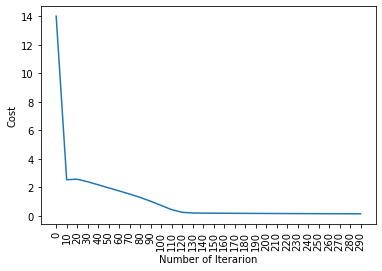

test accuracy: 95.16129032258064 %
train accuracy: 96.26436781609195 %


In [59]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # satir sayisi, kac piksel oldugu yani 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = prediction(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = prediction(parameters["weight"],parameters["bias"],x_train)

    # Print test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 300)    

### Logistic Regression with Sklearn

In [69]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state=42,max_iter =150) # max_iter : number iteration 
print("test accuracy: {}".format(logreg.fit(x_train.T,y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {}".format(logreg.fit(x_train.T,y_train.T).score(x_train.T,y_train.T)))

test accuracy: 0.967741935483871
train accuracy: 1.0
